<a href="https://colab.research.google.com/github/ruchibhadauria/machine-learning/blob/master/DarwinsFinches/DarwinsFinches_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For the past 40-plus years (from 1973 to 2013), Peter and Rosemary Grant visited the Galápagos island of Daphne Major and collected data on Darwin's finches, to study Darwin's theory of evolution.

The Grant's spend years observing, tagging, and measuring Darwin's finches and their environment. During that time they documented environmental changes and how these changes favored certain individuals within the population, illustrating natural selection in action.

The dataset focuses on finches beak dimension. For the finches, the size and shape of their beaks are traits that vary to adapt the environmental changes. The relationship between beak size and ecological events which has been somewhat popularised as being an example of ‘evolution occurring before our eyes’.

**Darwin's finches (also known as the Galápagos finches)** are a group of about 15 species of passerine birds.They are well known for their remarkable diversity in beak form and function. They are often classified as the subfamily Geospizinae or tribe Geospizini. They belong to the tanager family and are not closely related to the true finches. The closest known relative of the Galápagos finches is the South American Tiaris obscurus. They were first collected by Charles Darwin on the Galápagos Islands during the second voyage of the Beagle. Apart from the Cocos finch, which is from Cocos Island, the others are found only on the Galápagos Islands.

In [6]:
from IPython.display import Image
Image(url = 'https://www2.nau.edu/lrm22/lessons/bird_lab/finches.gif',width=800,height=200)

In [7]:
from IPython.display import Image
Image(url = 'https://www.mun.ca/biology/scarr/Geospiza_beaks.jpg',width=800,height=400)

This diagram presents 10 species of finch on the Galapagos Islands, each filling a different niche on various islands. All of the finch species evolved from one ancestral species, which colonized the islands only a few million years ago. This process, whereby species evolve rapidly to exploit empty ecological space, is known as adaptive radiation.

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette("Set1_r")
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [9]:
df_1975 = pd.read_csv('finch_beaks_1975.csv')
df_2012 = pd.read_csv('finch_beaks_2012.csv')

In [10]:
df_1975.head()

,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


In [11]:
df_1975.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   band             403 non-null    int64  
 1   species          403 non-null    object 
 2   Beak length, mm  403 non-null    float64
 3   Beak depth, mm   403 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.7+ KB


In [12]:
df_2012.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [13]:
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   band     248 non-null    int64  
 1   species  248 non-null    object 
 2   blength  248 non-null    float64
 3   bdepth   248 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.9+ KB


In [14]:
# Drop band column 
df_1975.drop('band', axis=1, inplace=True)
df_2012.drop('band', axis=1, inplace=True)

In [15]:
# Make a new column year
df_1975['year'] = '1975'
df_2012['year'] = '2012'

In [16]:
# Rename df_1975 columns to match that of df_2012
df_1975.rename(columns={'Beak depth, mm':'bdepth', 'Beak length, mm':'blength'}, inplace=True)

In [17]:
# Checking for any missing values
df_1975.isnull().sum()

species    0
blength    0
bdepth     0
year       0
dtype: int64

In [18]:
# Checking for any missing values
df_2012.isnull().sum()

species    0
blength    0
bdepth     0
year       0
dtype: int64

In [19]:
# Joining both the dataframes to get a combined new dataframe
df = pd.concat([df_1975, df_2012]).reset_index(drop=True)

In [20]:
print('\033[1m'+"Concise summary of combined dataframe"+'\033[0m \n')
df.info()

Concise summary of combined dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  651 non-null    object 
 1   blength  651 non-null    float64
 2   bdepth   651 non-null    float64
 3   year     651 non-null    object 
dtypes: float64(2), object(2)
memory usage: 20.5+ KB


There are total of 651 rows and 4 columns in our combined dataframe. Column blength and bdepth of float type. There is no missing value in the dataframe.

In [21]:
print('\033[1m'+"Species column value counts"+'\033[0m', df['species'].value_counts(), sep='\n\n')

Species column value counts

fortis      437
scandens    214
Name: species, dtype: int64


In [22]:
# Make new dataframes for each species
fortis = df[df['species']=='fortis'].reset_index(drop=True)
scandens = df[df['species']=='scandens'].reset_index(drop=True)

In [23]:
print('\033[1m'+"Summary statistics for G.fortis"+'\033[0m', fortis.describe(), sep='\n\n')

Summary statistics for G.fortis

          blength      bdepth
count  437.000000  437.000000
mean    10.551945    9.014851
std      0.711748    0.777729
min      8.700000    7.200000
25%     10.000000    8.400000
50%     10.500000    9.000000
75%     11.000000    9.600000
max     12.900000   11.100000



The mean and median for both the columns is almost equal signifying symmetrical distribution.

In [24]:
print('\033[1m'+"Summary statistics for G.scandens"+'\033[0m', scandens.describe(), sep='\n\n')

Summary statistics for G.scandens

          blength      bdepth
count  214.000000  214.000000
mean    13.705561    9.094252
std      0.809788    0.637941
min     11.400000    7.700000
25%     13.100000    8.662500
50%     13.700000    9.075000
75%     14.187500    9.500000
max     15.940000   11.000000


The mean and median for both the columns is almost equal signifying symmetrical distribution.

**Correlation** is a statistic that measures the degree to which two variables move in relation to each other.

In [25]:
print('\033[1m'+"Correlation matrix for G.fortis"+'\033[0m', fortis.corr(),
      '\033[1m'+"Correlation matrix for G.scandens"+'\033[0m', scandens.corr(), sep='\n\n')

Correlation matrix for G.fortis

          blength    bdepth
blength  1.000000  0.754008
bdepth   0.754008  1.000000

Correlation matrix for G.scandens

          blength    bdepth
blength  1.000000  0.407771
bdepth   0.407771  1.000000


The correlation matrices show us that there is positive correlation between beak length and beak depth in both the species. But there is a stronger correlation in G.fortis species than G.scandens species.

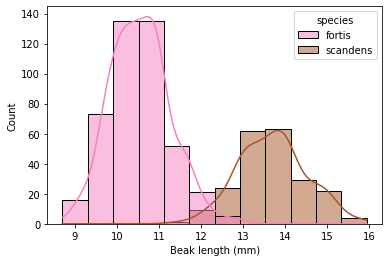

In [26]:
_ = sns.histplot(x='blength', data=df, hue='species', kde=True)
_ = plt.xlabel('Beak length (mm)')

The species have a quite distinguised range for beak length with only a little overlapping. The curve for both species resembles a normal curve as the data is symmetrical.

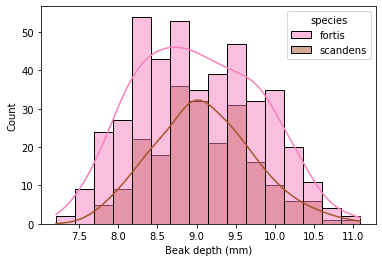

In [27]:
_ = sns.histplot(x='bdepth', data=df, hue='species', kde=True)
_ = plt.xlabel('Beak depth (mm)')

Both the species have approximately same range for beak depth. The curve for both species resembles a normal curve as the data is symmetrical.

### Exploratory Questions
Are there any relationships between the variables? What does the scatter of beak depth vs. beak length look like for species and year categories? Are the distributions of beak measure different by year for each species?

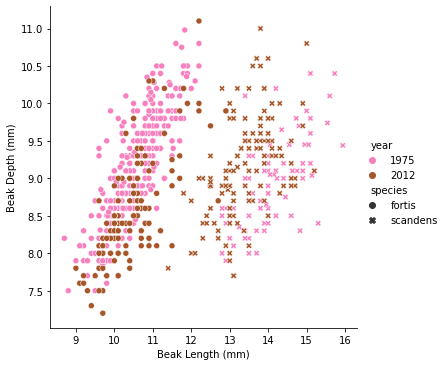

In [28]:
_ = sns.relplot(x='blength', y='bdepth', data=df, style='species', hue='year')
_ = plt.xlabel('Beak Length (mm)')
_ = plt.ylabel('Beak Depth (mm)')

From the plot we can see that species G.fortis and G.scandens are easily distinguished. For G.fortis species represented by (.) dot the beak size got less deeper (the brown dots are lower down in the y-direction) and a little longer (brown dot furthur ahead in the x-direction). The beak size of G.scandens species represented by (x) have got a little deeper (brown x's in higher up in y-direction) and shorter(brown x's to the left of pink x's).

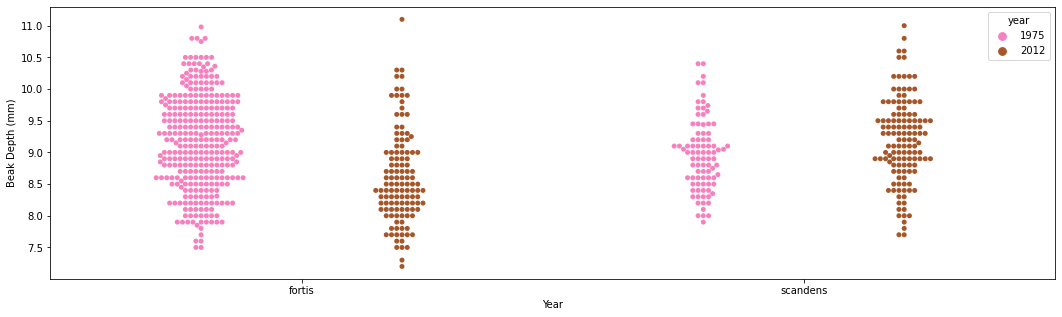

In [29]:
_ = plt.figure(figsize=(18, 5))
_ = sns.swarmplot(x='species', y='bdepth', data=df, hue='year', dodge=True)
_ = plt.xlabel('Year')
_ = plt.ylabel('Beak Depth (mm)')

From the swarm plot we are not able to see a clear difference between the 1975 and 2012 dataset for both species. Eyeballing it, it appears as though the mean of 1975 might be higher in case of G.fortis and for G.scandens 2012 appears to have a higher mean. We need to check the ECDFs.

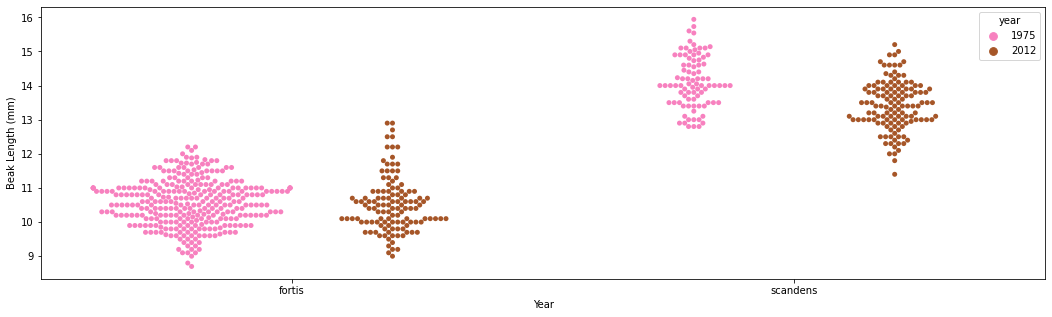

In [30]:
_ = plt.figure(figsize=(18, 5))
_ = sns.swarmplot(x='species', y='blength', data=df, hue='year', dodge=True)
_ = plt.xlabel('Year')
_ = plt.ylabel('Beak Length (mm)')

From the swarm plot it is kind of hard to see if there is clear difference between the 1975 and 2012 dataset for G.fortis but for G.scandens we can see that 1975 have a higher mean.

**ECDF** is an estimator of the Cumulative Distribution Function. An ECDF represents the proportion or count of observations falling below each unique value in a dataset.

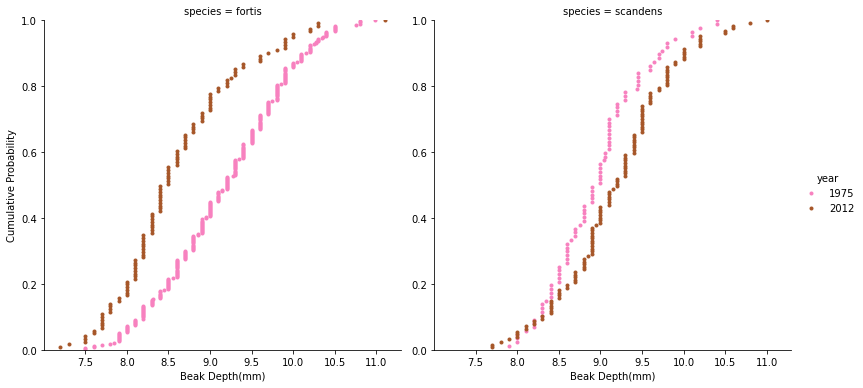

In [31]:
g = sns.FacetGrid(df, col="species", hue="year", height=5.5, sharey=False)
_ = g.map(sns.ecdfplot, 'bdepth', linestyle='none', marker='.')
_ = g.add_legend()
_ = g.set_axis_labels('Beak Depth(mm)', 'Cumulative Probability')

For G.fortis the mean beak depth of 2012 is considerably shorter than 1975. Whereas, for species G.scandens the mean beak depth has increased slightly from 1975 to 2012. The variance is slightly higher for G.scandens in 2012.

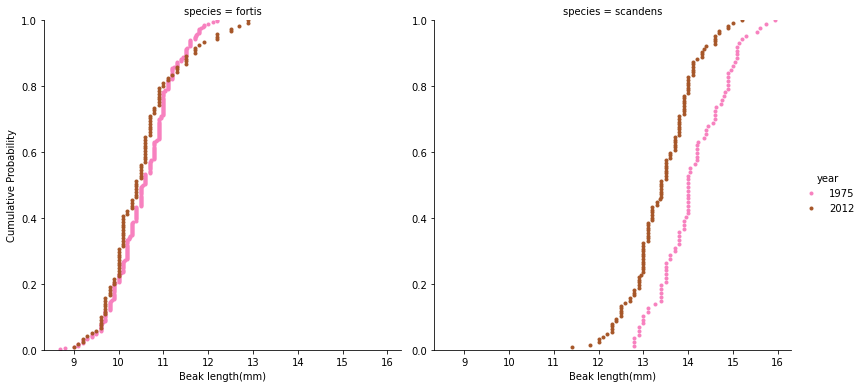

In [32]:
g = sns.FacetGrid(df, col="species", hue="year", height=5.5, sharey=False)
_ = g.map(sns.ecdfplot, 'blength', linestyle='none', marker='.')
_ = g.add_legend()
_ = g.set_axis_labels('Beak length(mm)', 'Cumulative Probability')

Eyeballing, the plots above we can say that there are minute change in the mean beak length of G.fortis in 2012 than 1975, the mean beak length of 2012 appears to be shorter and it has a bigger variance. Whereas, it is clearly visible that mean beak length decreased in 2012 for G.scandens species.

G. fortis doesn't vary much for beak length but does have a different variance and mean for beak depth. G. scandens appears to have a different variance and mean for both beak length and beak depth. If the ratio of these morphologies are significantly different, I think it could show that a species is evolving. To test this question, I will formulate a hypothesis for the ratio of morphologies within both species of finch.

### Hypothesis
Null: There is not a significant difference of morphology ratio in G. fortis or G. scandens from 1975 to 2012.

Alt: There is a significant difference of morphology ratio in G. fortis or G. scandens from 1975 to 2012.

### Beak length to depth ratio for G.scandens species

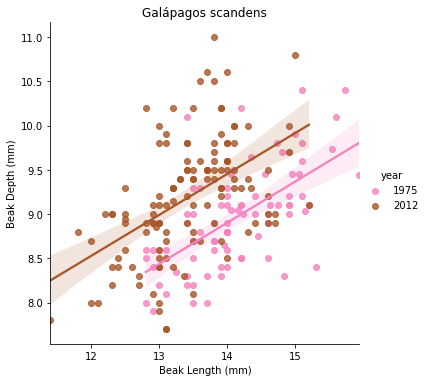

In [33]:
# Running a linear model shows predictions of each group and the range of confidence associated with each.
# linear regression model for each species 
_ = sns.lmplot(x='blength', y='bdepth', hue = 'year', data=scandens)  
_ = plt.xlabel('Beak Length (mm)')
_ = plt.ylabel('Beak Depth (mm)')
_ = plt.title('Galápagos scandens')

The plot shows that slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years.

In [34]:
# Bootstrap replicate function
def bs_reps(data,func,size=1) :
    bs_rep = np.empty(size)
    for i in range(size) :
        bs_rep[i] = func(np.random.choice(data,size=len(data)))
    return bs_rep

In [35]:
s_bdepth_1975 = scandens['bdepth'][scandens['year'] == '1975'].reset_index(drop=True)
s_bdepth_2012 = scandens['bdepth'][scandens['year'] == '2012'].reset_index(drop=True)
s_blength_1975 = scandens['blength'][scandens['year'] == '1975'].reset_index(drop=True)
s_blength_2012 = scandens['blength'][scandens['year'] == '2012'].reset_index(drop=True)

f_bdepth_1975 = fortis['bdepth'][fortis['year'] == '1975'].reset_index(drop=True)
f_bdepth_2012 = fortis['bdepth'][fortis['year'] == '2012'].reset_index(drop=True)
f_blength_1975 = fortis['blength'][fortis['year'] == '1975'].reset_index(drop=True)
f_blength_2012 = fortis['blength'][fortis['year'] == '2012'].reset_index(drop=True)

In [36]:
# Compute the difference of the both beak depth
s_mean = scandens.groupby('year').mean()
s_mean_diff = s_mean.iloc[1] - s_mean.iloc[0]
print('\033[1m\033[4m'+'G.scandens mean'+'\033[0m', s_mean, '\033[1m\033[4m'+'G.scandens mean difference'+'\033[0m', s_mean_diff, sep='\n\n')
print('')
f_mean = fortis.groupby('year').mean()
f_mean_diff = f_mean.iloc[1] - f_mean.iloc[0]
print('\033[1m\033[4m'+'G.fortis mean'+'\033[0m', f_mean, '\033[1m\033[4m'+'G.fortis mean difference'+'\033[0m', f_mean_diff, sep='\n\n')

G.scandens mean

        blength   bdepth
year                    
1975  14.120920  8.96000
2012  13.421024  9.18622

G.scandens mean difference

blength   -0.699896
bdepth     0.226220
dtype: float64

G.fortis mean

        blength    bdepth
year                     
1975  10.565190  9.171646
2012  10.517355  8.605372

G.fortis mean difference

blength   -0.047835
bdepth    -0.566274
dtype: float64


In [37]:
# Compute length-to-depth ratio for scandens species
s_ratio_1975 = s_blength_1975 / s_bdepth_1975
s_ratio_2012 = s_blength_2012 / s_bdepth_2012

# Compute means
s_mean_ratio_1975 = np.mean(s_ratio_1975)
s_mean_ratio_2012 = np.mean(s_ratio_2012)

# Generate bootstrap replicates of the means
s_bs_replicates_1975 = bs_reps(s_ratio_1975, np.mean, size=10000)
s_bs_replicates_2012 = bs_reps(s_ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
s_ci_1975 = np.percentile(s_bs_replicates_1975, [0.5, 99.5])
s_ci_2012 = np.percentile(s_bs_replicates_2012, [0.5, 99.5])

print('1975: Mean ratio = {}  Confidence interval = {}'.format(s_mean_ratio_1975, s_ci_1975))
print('2012: Mean ratio = {}  Confidence interval = {}'.format(s_mean_ratio_2012, s_ci_2012))

1975: Mean ratio = 1.5788823771858533  Confidence interval = [1.55637282 1.60018823]
2012: Mean ratio = 1.4658342276847778  Confidence interval = [1.44426024 1.48770641]


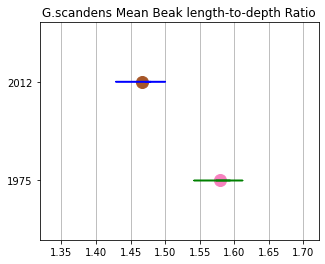

In [38]:
_ = plt.figure(figsize=(5,4))
_ = plt.plot(s_mean_ratio_1975, 1975,  'o', markersize=12)
_ = plt.plot(s_mean_ratio_2012, 2012,  'o', markersize=12)

y5 = np.full((10000), 1975)
_ = plt.plot(s_bs_replicates_1975, y5, color = 'green')

y2 = np.full((10000), 2012)
_ = plt.plot(s_bs_replicates_2012, y2, color = 'b')

_ = plt.yticks([1975, 2012])
_ = plt.margins(0.6)
_ = plt.title('G.scandens Mean Beak length-to-depth Ratio')
_ = plt.grid(axis='x')

plt.show()

The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

### Beak length to depth ratio for G.fortis species

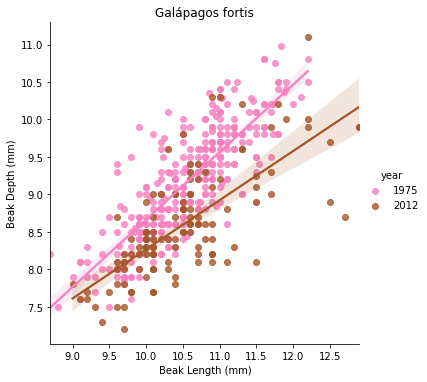

In [39]:
_ = sns.lmplot(x='blength', y='bdepth', hue = 'year', data=fortis)  
_ = plt.xlabel('Beak Length (mm)')
_ = plt.ylabel('Beak Depth (mm)')
_ = plt.title('Galápagos fortis')

We can see that line for 1975 is steeper than for 2012. We can say that for every 0.5mm increase in beak length the change in beak depth is higher in 1975 than 2012.

In [40]:
# Compute length-to-depth ratio for fortis species
f_ratio_1975 = f_blength_1975 / f_bdepth_1975
f_ratio_2012 = f_blength_2012 / f_bdepth_2012

# Compute means
f_mean_ratio_1975 = np.mean(f_ratio_1975)
f_mean_ratio_2012 = np.mean(f_ratio_2012)

# Generate bootstrap replicates of the means
f_bs_replicates_1975 = bs_reps(f_ratio_1975, np.mean, size=10000)
f_bs_replicates_2012 = bs_reps(f_ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
f_ci_1975 = np.percentile(f_bs_replicates_1975, [0.5, 99.5])
f_ci_2012 = np.percentile(f_bs_replicates_2012, [0.5, 99.5])

print('1975: Mean ratio = {}  Confidence interval = {}'.format(f_mean_ratio_1975, f_ci_1975))
print('2012: Mean ratio = {}  Confidence interval = {}'.format(f_mean_ratio_2012, f_ci_2012))

1975: Mean ratio = 1.154557328563076  Confidence interval = [1.14689486 1.16208303]
2012: Mean ratio = 1.2250642338241673  Confidence interval = [1.20860667 1.24174097]


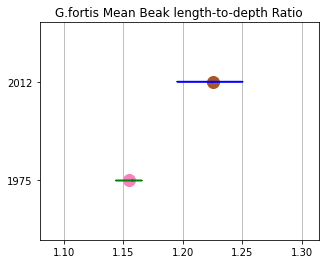

In [41]:
_ = plt.figure(figsize=(5,4))
_ = plt.plot(f_mean_ratio_1975, 1975, 'o', markersize=12)
_ = plt.plot(f_mean_ratio_2012, 2012, 'o', markersize=12)

y5 = np.full((10000), 1975)
_ = plt.plot(f_bs_replicates_1975, y5, color = 'green')

y2 = np.full((10000), 2012)
_ = plt.plot(f_bs_replicates_2012, y2, color = 'b')

_ = plt.yticks([1975, 2012])
_ = plt.margins(0.6)
_ = plt.title('G.fortis Mean Beak length-to-depth Ratio')
_ = plt.grid(axis='x')

plt.show()

The mean beak length-to-depth ratio increased by about 0.07, or 6%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

### Conclusion
We can reject the null and accept the alternative. This is, there is a significant difference in the morphology ratio for G. fortis or G. scandens from 1975 to 2012. What we find is there is a significant difference for both species. G. fortis has an increasing beak length to depth ratio and G. scandens has a decreasing beak length to depth ratio.